Data manipulation and exploration
--
This is a hands-on tutorial for Pandas package. You will need to consult frequently the on-line documention. Pandas is a Python library for data manipulation, cleaning and analysis. This package can read data in different formats such as text, csv, excel, parquet, json etc. The structured data are kept in dataframes. You can apply aggregation, union, join etc operations on dataframes and manipulate the column/line values. This package is compatible with Numpy library.

In [1]:
!pip3 install unidecode 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 6.2 MB/s eta 0:00:00


In [2]:
import unidecode

import pandas as pd
import seaborn as seab
from matplotlib import pyplot as plt

seab.set(font_scale=1.5)


In [3]:
#Read the file cons_elec_france.csv as a Pandas dataframe :
df_cons = pd.read_csv( "cons_elec_france.csv" )

In [9]:
# Display the first five lines of the df_cons by using the 
# "head" function :
df_cons.head()

,2015-11-13;Entreprises;13882225479
0,2015-11-11;Professionnels;3746294820
1,2015-12-18;Professionnels;5523363437
2,2015-12-06;Résidentiels;22545973870
3,2015-10-30;Résidentiels;15903891494
4,2015-10-20;Entreprises;14862039750


In [10]:
# Display the last five lines of the df_cons by using 
# the "tail" function :
df_cons.tail()


,2015-11-13;Entreprises;13882225479
7298,2017-01-31;Professionnels;6156059505
7299,2017-02-10;Résidentiels;26943398299
7300,2017-02-10;PME / PMI;6815115652
7301,2017-02-10;Professionnels;6983274500
7302,2017-03-11;Professionnels;4616006030


In [11]:
# Some information about the dataframe :
df_cons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 1 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   2015-11-13;Entreprises;13882225479  7303 non-null   object
dtypes: object(1)
memory usage: 57.2+ KB


In [24]:
from pandas.io.formats.style import FilePathOrBuffer
# The dataframe has no correct header and columns are not 
# separated correctly.
# Re-use the read_csv function and give the correct separator 
# and the following column name (look at online documentation):
colNames=["date", "client_category", "daily_consumption"]
df_cons = pd.read_csv('cons_elec_france.csv', sep= ';', names= colNames )

In [25]:
# Display the first lines of df_cons :
df_cons.head()

,date,client_category,daily_consumption
0,2015-11-13,Entreprises,13882225479
1,2015-11-11,Professionnels,3746294820
2,2015-12-18,Professionnels,5523363437
3,2015-12-06,Résidentiels,22545973870
4,2015-10-30,Résidentiels,15903891494


In [19]:
# Once again use info() function on df_cons and pay attention to 
# dtype (data type)
df_cons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 1 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   2015-11-13;Entreprises;13882225479  7303 non-null   object
dtypes: object(1)
memory usage: 57.2+ KB


You should see somthing like this : \
\
date &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;  object \
client_category   &emsp;&emsp;&emsp;&emsp;&nbsp; object \
daily_consumption   &emsp;&emsp;&emsp;  int64 \
dtype: &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;  object \
\
object type is a global type that means anything that we can assign to a variable in Python. Some exmple types are numbers (integers, floating-point and complex numbers), booleans, the “null” type, strings, lists, dicts, nested objects etc.\
Here Python has assigned int type to daily_consumption but it did not identify any particular type for other columns. We can ask Python to cast the types.  

In [26]:
#datetime conversion
df_cons["date"] = pd.to_datetime(df_cons["date"], 
                                 format="%Y-%m-%d", 
                                 errors="coerce")
df_cons.dtypes
# Question : what are the role of format and errors ?

date                 datetime64[ns]
client_category              object
daily_consumption             int64
dtype: object

In [27]:
# float conversion
df_cons["daily_consumption"] = \
    df_cons["daily_consumption"].astype(float)
df_cons.dtypes

date                 datetime64[ns]
client_category              object
daily_consumption           float64
dtype: object

In [ ]:
df_cons

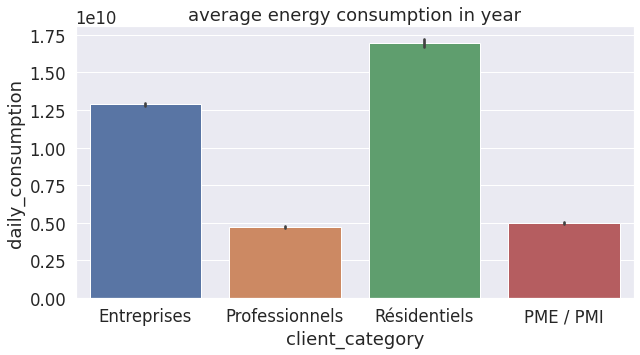

In [29]:
fig, axs = plt.subplots(figsize = (10,5))
seab.barplot (data = df_cons, x= "client_category", y ="daily_consumption")
plt.title("average energy consumption in year")
plt.show()

In [31]:
# Drop the duplicated rows :
df_cons = df_cons.drop_duplicates()
# Question : Were there any duplicated rows ?

In [32]:
# Use describe method to have some statistical info
df_cons.describe()

,daily_consumption
count,7.304000e+03
mean,9.882748e+09
std,6.234929e+09
min,2.812475e+09
25%,4.720512e+09
50%,8.149467e+09
75%,1.401314e+10
max,3.635733e+10


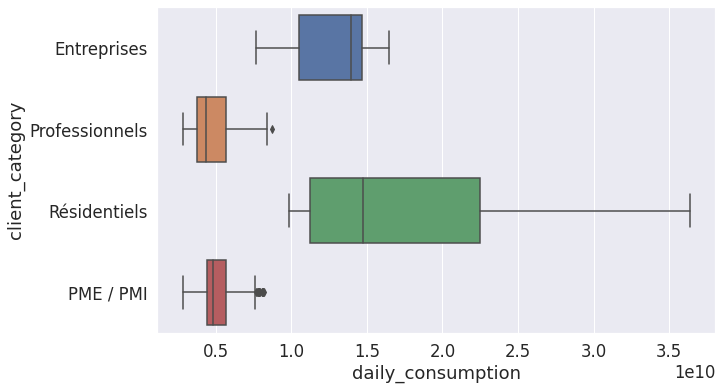

In [33]:
# Boxplot is a powerfull tool to illustraues the outliers. 
# Look for on-line documention on boxplots.
fig, ax = plt.subplots( figsize=(10, 6) )
seab.boxplot( data=df_cons, x="daily_consumption", 
             y="client_category", orient="h" )
plt.show()

In [ ]:
# Task : find the first and last dates in the dataframe : 


In [36]:
# Task : sort the df_cons by date by using sort_values method :
df_cons.sort_values(by ='date', ascending = False, inplace = True)

In [39]:
# Task : add a new column "year" to df_cons that contains #        the year for each entry.
# Hint : you should extract year from df_cons["date"]
df_cons["year"] = df_cons['date'].dt.year
df_cons =df_cons.assign()

In [41]:
# Task : find the unique categories in client_category 
#   columns by applying the unique() method.
df_cons["client_category"].unique()

array(['résidentiels', 'pme / pmi', 'professionnels', 'entreprises'],
      dtype=object)

In [42]:
# Task : explain the following code :
df_cons["client_category"] = \
    df_cons["client_category"].str.lower()

In [45]:
# Removing the accents from client_category column
df_cons["client_category"] = \
  df_cons["client_category"].apply(unidecode.unidecode)

In [46]:
# Mean consumption per client category
# Task : explain the following code line by line :
df_cl_cons = df_cons[["daily_consumption", "client_category"]]\
    .groupby( "client_category" )\
    .mean()\
    .reset_index()\
    .sort_values("daily_consumption")\
    .rename( columns={"daily_consumption" : "yearly_consumption"} )

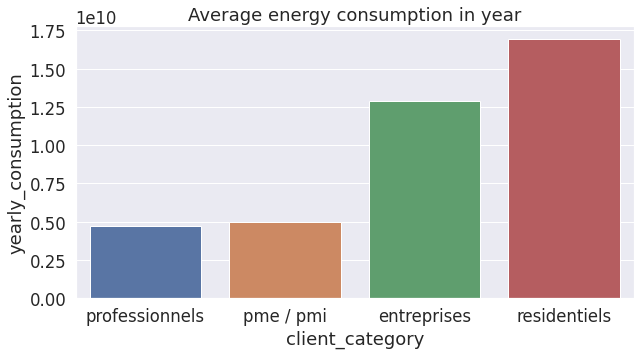

In [52]:
# Task : run and explain the following code :
fig, axs = plt.subplots( figsize=(10, 5) )
seab.barplot( data=df_cl_cons, x="client_category", 
             y="yearly_consumption" )
plt.title( "Average energy consumption in year" )
plt.show()

In [54]:
# Task : compute the total energy consumption per year per different 
#        client category
# Hint : use groupby method to regroup the df_cons by year and 
#        client_category and 
#        then sum on daily_consumption. date column should not be  
#        included in groupby.

df_year_cat = df_cons[["client_category","daily_consumption", "year"]]\
.groupby (["year", "client_category"]).sum()\
.reset_index()\
.rename(columns ={"daily_consumption": "yearly_sum_consumption"})
df_year_cat

,year,client_category,yearly_sum_consumption
0,2013,entreprises,1.702219e+12
1,2013,pme / pmi,6.290443e+11
2,2013,professionnels,6.500776e+11
3,2013,residentiels,2.281108e+12
4,2014,entreprises,4.702533e+12
5,2014,pme / pmi,1.707706e+12
6,2014,professionnels,1.702861e+12
7,2014,residentiels,5.903346e+12
8,2015,entreprises,4.732596e+12
9,2015,pme / pmi,1.771248e+12


In [55]:
# Task : Display the df_year_cons dataframe :
df_year_cat.head()

,year,client_category,yearly_sum_consumption
0,2013,entreprises,1.702219e+12
1,2013,pme / pmi,6.290443e+11
2,2013,professionnels,6.500776e+11
3,2013,residentiels,2.281108e+12
4,2014,entreprises,4.702533e+12


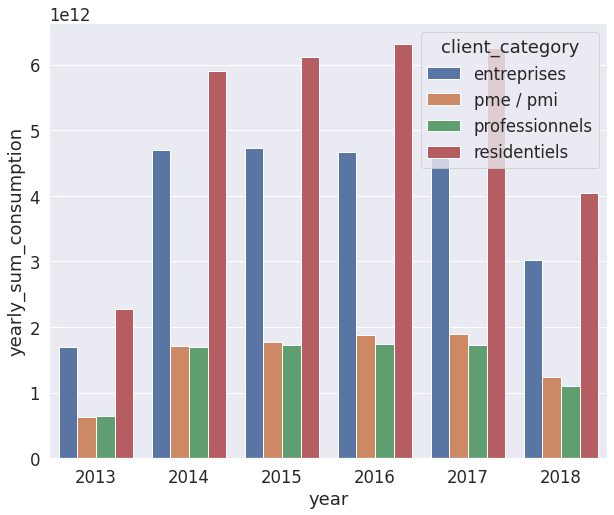

In [62]:
# Plotting total consumption for different years and different 
#  client categories
fig, ax = plt.subplots( figsize=(10, 8) )
seab.barplot(x="year", y="yearly_sum_consumption", hue="client_category",
               data=df_year_cat)
plt.show()
#Question : what is the role of hue parameter in catplot ? 

In [63]:
df = pd.DataFrame({"year":range(10,15),"category":list("abcde")})
#df.info()
df

,year,category
0,10,a
1,11,b
2,12,c
3,13,d
4,14,e


In [64]:
df[(df["year"]<13)]

,year,category
0,10,a
1,11,b
2,12,c


In [66]:
df[ (df["year"]<14) & (df["year"]>10)]

,year,category
1,11,b
2,12,c
3,13,d


In [68]:
df[df["category"].isin(["a","c","o"])]

,year,category
0,10,a
2,12,c


In [71]:
df[(df["category"].isin(["a","c","o"]))& (df["year"]<14)]

,year,category
0,10,a
2,12,c


In [67]:
df[df["year"]==12]

,year,category
2,12,c


In [74]:
# Task : From df_cons select data for 2016 with "residentiels" and 
#        "entreprises" as clients. Make a lineplot for  
#        daily_consumption versus date for the two different 
df = df_cons[(df_cons["year"]==2016) & (df_cons["client_category"].isin(["residentiels", "entreprises"]))]
df

,date,client_category,daily_consumption,year
3488,2016-12-31,residentiels,3.217731e+10,2016
1748,2016-12-31,entreprises,9.705998e+09,2016
3901,2016-12-30,entreprises,1.174681e+10,2016
3657,2016-12-30,residentiels,2.953882e+10,2016
1549,2016-12-29,residentiels,2.810850e+10,2016
...,...,...,...,...
4873,2016-01-03,residentiels,2.430081e+10,2016
4943,2016-01-02,residentiels,2.267567e+10,2016
4944,2016-01-02,entreprises,9.076890e+09,2016
566,2016-01-01,entreprises,8.914158e+09,2016


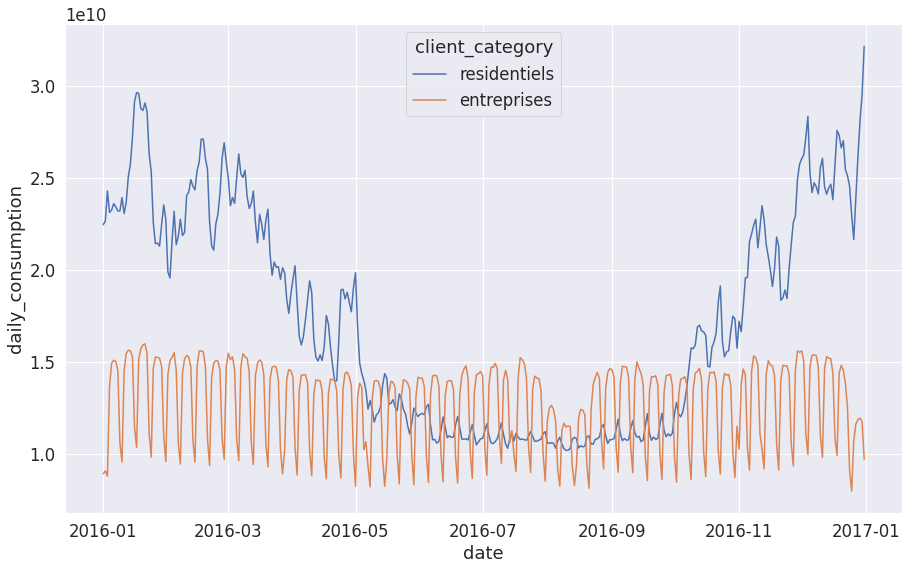

In [78]:
# Question : Interpret the previous plot. 
#            Why the plots varies by time for residentials ?
#            Why for enterprises the plot is comb-like ? 
fig, ax = plt.subplots( figsize=( 15, 9) )
seab.lineplot(data= df, x="date", y="daily_consumption" , hue="client_category")

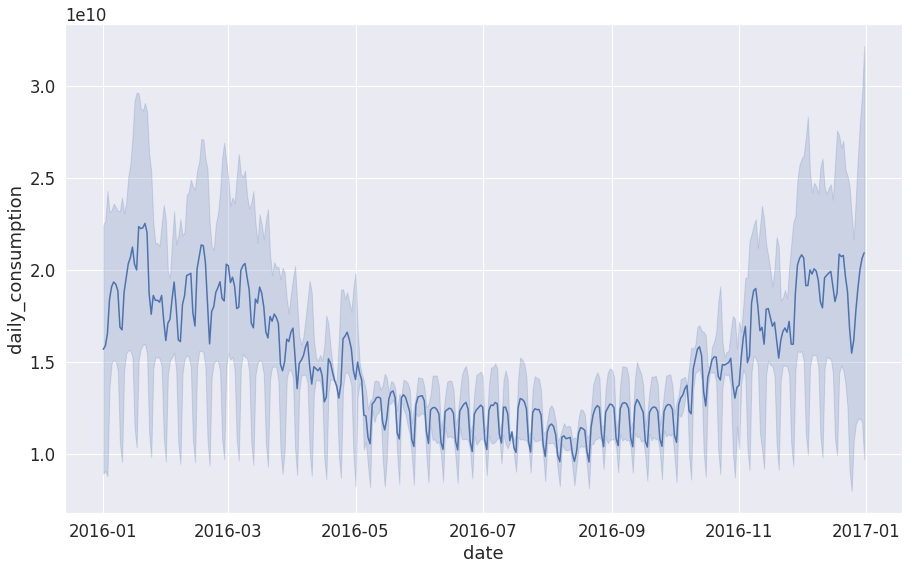

In [80]:
fig, ax = plt.subplots( figsize=( 15, 9) )
seab.lineplot(data= df, x="date", y="daily_consumption")

In [ ]:
# Task : Replot the previous task without using the hue parameter and 
#        explain the difference.


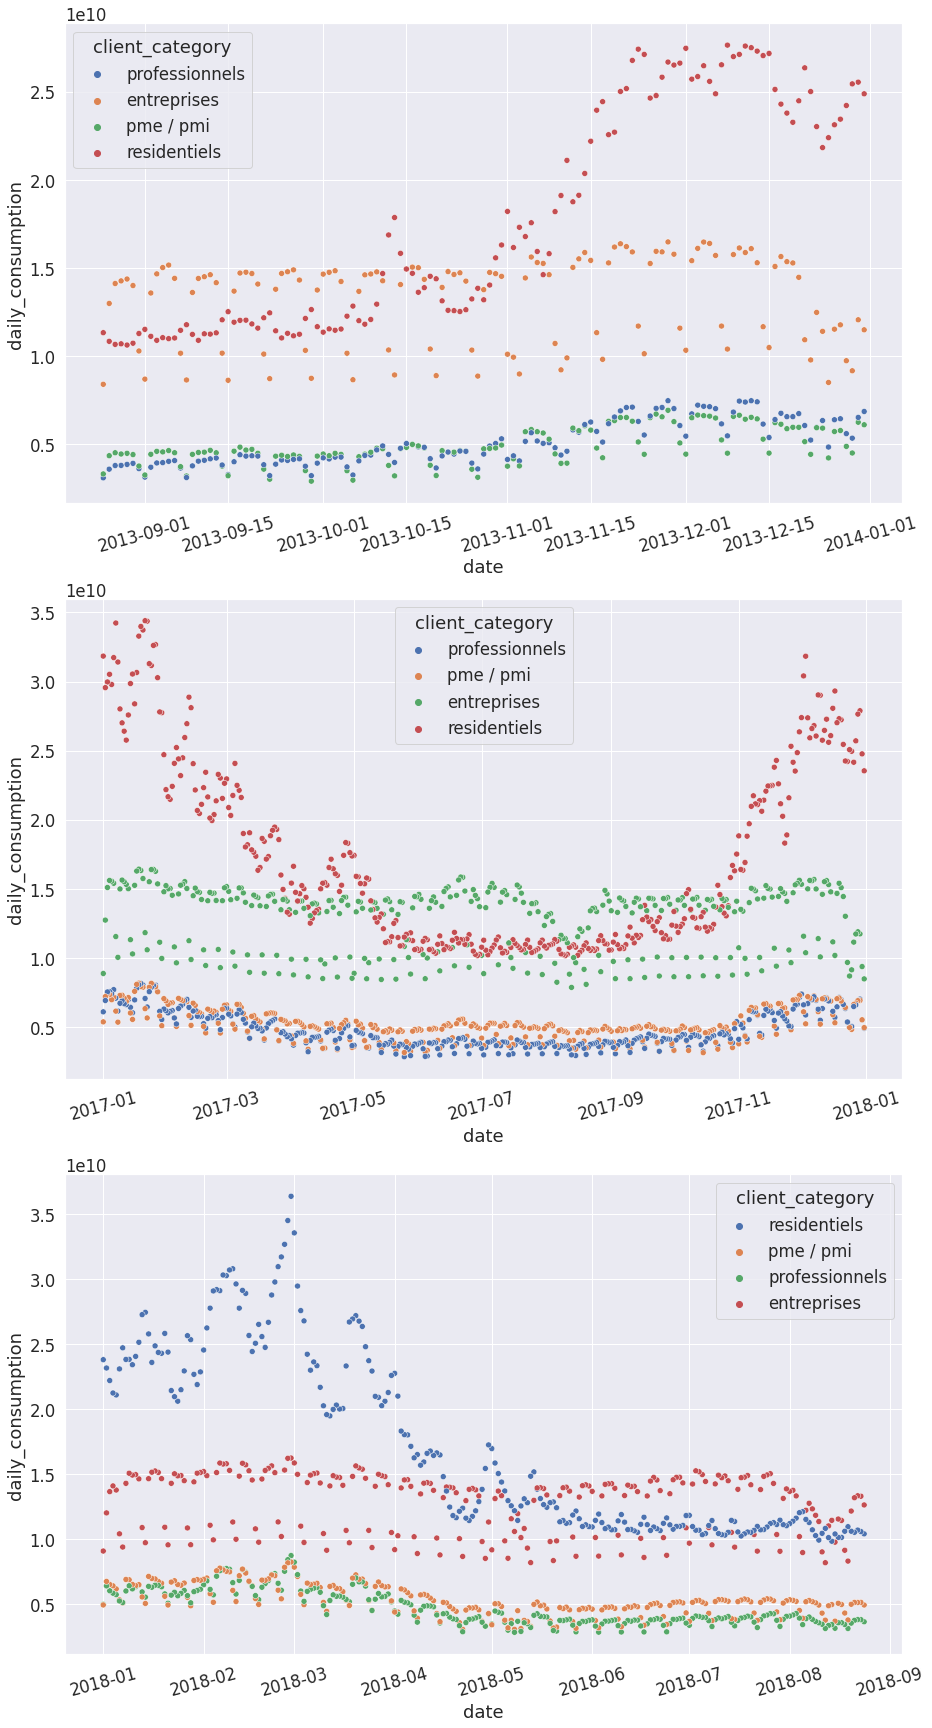

In [58]:
# Task : Explaine the following code :
fig, axs = plt.subplots( 3,1, figsize=(15, 30) )
for i, y in enumerate( [2013, 2017, 2018] ) :
    seab.scatterplot( data=df_cons[df_cons["year"]==y], 
                     x="date", y="daily_consumption", 
                     hue="client_category",ax=axs[i] )
    axs[i].tick_params(axis='x', rotation=15)


### Exercises 
**groupby followed by multiple aggregation** 
* Regroup the df_cons dataframe by client_category and year then find a method that make a sum over daily_consumption and count on date. Sort the regrouped dataframe by daily_consumption and rename the columns as : "client_category", "year", "yearly_consumption" and "n_days". 
* Display the regrouped dataframe. 
* Make a barplot that shows the some of yearly_consumption versus n_days for different client categories.


**Mean consumption per weekdays**
* From df_cons select data for 2017 and residential category. Extract the week day names from the date column. Compute the mean consumption per day. 
* Make lineplot for mean consumption versus week day. 
* How do you interpret the plot ? 